In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras import regularizers,initializers
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD,RMSprop,Adagrad,Adadelta,Adam,Adamax,Nadam
import matplotlib.pyplot as plt

2023-04-23 21:35:09.410788: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [31]:
from main_encoder import MainEncoder
from final_encoder import FinalEncoder
from small_decoder import SmallDecoder 
from big_decoder import BigDecoder

In [3]:
gene = pd.read_csv("final_gene.txt", sep="\t")
methyl = pd.read_csv('final_methyl.txt', sep="\t")
prot = pd.read_csv('final_prot.txt', sep="\t")

In [4]:
gene = gene.set_index('participant_id')
methyl = methyl.set_index('participant_id')
prot = prot.set_index('participant_id')

In [5]:
gene_sample = gene['sample_type']
methyl_sample = methyl['sample_type']
prot_sample = prot['sample_type']

In [6]:
gene_index = gene.index
methyl_index = methyl.index
prot_index = prot.index

In [7]:
gene_columns = gene.columns
methyl_columns = methyl.columns
prot_columns = prot.columns

In [8]:
gene.drop(columns = ['sample_type'], inplace = True)
methyl.drop(columns = ['sample_type'], inplace = True)
prot.drop(columns = ['sample_type'], inplace = True)

In [13]:
#Run this cell for x = gene, methyl and prot to get the indivdual latent spaces of all the modalities
x =  methyl
if x.equals(gene):
    input_dim = 915
    latent_dim = 20
    encoder = MainEncoder(input_dim, latent_dim)
    encoded_gene = encoder.predict(x)
    
elif x.equals(methyl):
    input_dim = 1006
    latent_dim = 20
    encoder = MainEncoder(input_dim, latent_dim)
    encoded_methyl = encoder.predict(x)
elif x.equals(prot): 
    input_dim = 226
    latent_dim = 20   
    encoder = MainEncoder(input_dim, latent_dim)
    encoded_prot = encoder.predict(x)

20/20 [==============================] - 0s 2ms/step


In [14]:
concatenated_latent_space = np.concatenate((encoded_gene, encoded_prot, encoded_methyl), axis=1)

In [16]:
final_encoder = FinalEncoder(input_dim=60, latent_dim=15)
integrated_space = final_encoder.predict(concatenated_latent_space)

20/20 [==============================] - 0s 1ms/step


In [17]:
decoder_small = SmallDecoder(input_dim=15, decode_dim=60)
adam = keras.optimizers.Adam(learning_rate=0.001)
decoder_small.compile(optimizer= adam , loss='mse')

In [18]:
decoder_small.fit(integrated_space, concatenated_latent_space , epochs=1000)

Epoch 1/1000
20/20 [==============================] - 1s 2ms/step - loss: 7.6126
Epoch 2/1000
20/20 [==============================] - 0s 2ms/step - loss: 6.9216
Epoch 3/1000
20/20 [==============================] - 0s 1ms/step - loss: 6.3233
Epoch 4/1000
20/20 [==============================] - 0s 2ms/step - loss: 5.6285
Epoch 5/1000
20/20 [==============================] - 0s 1ms/step - loss: 4.8380
Epoch 6/1000
20/20 [==============================] - 0s 1ms/step - loss: 3.9558
Epoch 7/1000
20/20 [==============================] - 0s 2ms/step - loss: 3.0435
Epoch 8/1000
20/20 [==============================] - 0s 2ms/step - loss: 2.1969
Epoch 9/1000
20/20 [==============================] - 0s 1ms/step - loss: 1.4788
Epoch 10/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.9518
Epoch 11/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.6169
Epoch 12/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.4469
Epoch 13/1000
20/20 [====

20/20 [==============================] - 0s 1ms/step - loss: 0.1208
Epoch 102/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1066
Epoch 103/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1003
Epoch 104/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0976
Epoch 105/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1142
Epoch 106/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0934
Epoch 107/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1097
Epoch 108/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1009
Epoch 109/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1097
Epoch 110/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1138
Epoch 111/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1213
Epoch 112/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0963
Epoch 113/1000
20/2

20/20 [==============================] - 0s 1ms/step - loss: 0.1053
Epoch 200/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1007
Epoch 201/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0887
Epoch 202/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0887
Epoch 203/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1010
Epoch 204/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0897
Epoch 205/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0898
Epoch 206/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0883
Epoch 207/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0923
Epoch 208/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0909
Epoch 209/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0929
Epoch 210/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0965
Epoch 211/1000
20/2

20/20 [==============================] - 0s 1ms/step - loss: 0.0815
Epoch 298/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0709
Epoch 299/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0992
Epoch 300/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0938
Epoch 301/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1014
Epoch 302/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0997
Epoch 303/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0746
Epoch 304/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0940
Epoch 305/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0814
Epoch 306/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0921
Epoch 307/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0893
Epoch 308/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0761
Epoch 309/1000
20/2

20/20 [==============================] - 0s 1ms/step - loss: 0.0663
Epoch 396/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0933
Epoch 397/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0755
Epoch 398/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0738
Epoch 399/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0821
Epoch 400/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0924
Epoch 401/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0750
Epoch 402/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0921
Epoch 403/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0932
Epoch 404/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0956
Epoch 405/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0719
Epoch 406/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0646
Epoch 407/1000
20/2

20/20 [==============================] - 0s 1ms/step - loss: 0.0673
Epoch 494/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0681
Epoch 495/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0815
Epoch 496/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0989
Epoch 497/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0839
Epoch 498/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0832
Epoch 499/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0869
Epoch 500/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0730
Epoch 501/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0744
Epoch 502/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0694
Epoch 503/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0613
Epoch 504/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0877
Epoch 505/1000
20/2

20/20 [==============================] - 0s 1ms/step - loss: 0.0964
Epoch 592/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0721
Epoch 593/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0680
Epoch 594/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0678
Epoch 595/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0691
Epoch 596/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0822
Epoch 597/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0831
Epoch 598/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0889
Epoch 599/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0885
Epoch 600/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0811
Epoch 601/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0668
Epoch 602/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0891
Epoch 603/1000
20/2

20/20 [==============================] - 0s 1ms/step - loss: 0.0600
Epoch 690/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0771
Epoch 691/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0683
Epoch 692/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0821
Epoch 693/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0749
Epoch 694/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0789
Epoch 695/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0773
Epoch 696/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0821
Epoch 697/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0645
Epoch 698/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0688
Epoch 699/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0843
Epoch 700/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0731
Epoch 701/1000
20/2

20/20 [==============================] - 0s 1ms/step - loss: 0.0787
Epoch 788/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0611
Epoch 789/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0723
Epoch 790/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0810
Epoch 791/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0617
Epoch 792/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.0592
Epoch 793/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0727
Epoch 794/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0711
Epoch 795/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0783
Epoch 796/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0762
Epoch 797/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0685
Epoch 798/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0700
Epoch 799/1000
20/2

20/20 [==============================] - 0s 1ms/step - loss: 0.0899
Epoch 886/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0749
Epoch 887/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0651
Epoch 888/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0666
Epoch 889/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0723
Epoch 890/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0539
Epoch 891/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0725
Epoch 892/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0611
Epoch 893/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0809
Epoch 894/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0581
Epoch 895/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0826
Epoch 896/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0631
Epoch 897/1000
20/2

20/20 [==============================] - 0s 1ms/step - loss: 0.0686
Epoch 984/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0667
Epoch 985/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0637
Epoch 986/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0556
Epoch 987/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0749
Epoch 988/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0642
Epoch 989/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0607
Epoch 990/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0604
Epoch 991/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0598
Epoch 992/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0685
Epoch 993/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0634
Epoch 994/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0732
Epoch 995/1000
20/2

In [19]:
conc_reconstructed_data = decoder_small.predict(integrated_space)

20/20 [==============================] - 0s 782us/step


In [48]:

decoder_big = BigDecoder(input_dim=60, decode_dim=226)
adam = keras.optimizers.Adam(learning_rate=0.001)
decoder_big.compile(optimizer= adam , loss='mse')

In [49]:
decoder_big.fit(conc_reconstructed_data, prot, epochs=1000)

Epoch 1/1000
20/20 [==============================] - 1s 3ms/step - loss: 0.4302
Epoch 2/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.4235
Epoch 3/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.4190
Epoch 4/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.4096
Epoch 5/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.3933
Epoch 6/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.3761
Epoch 7/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.3743
Epoch 8/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.3744
Epoch 9/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.3703
Epoch 10/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.3674
Epoch 11/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.3623
Epoch 12/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.3578
Epoch 13/1000
20/20 [====

20/20 [==============================] - 0s 2ms/step - loss: 0.1955
Epoch 102/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.1952
Epoch 103/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.2021
Epoch 104/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.2049
Epoch 105/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.2058
Epoch 106/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.1951
Epoch 107/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.1845
Epoch 108/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.1819
Epoch 109/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.1919
Epoch 110/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.1843
Epoch 111/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.1775
Epoch 112/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.1749
Epoch 113/1000
20/2

20/20 [==============================] - 0s 3ms/step - loss: 0.0957
Epoch 200/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0926
Epoch 201/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0918
Epoch 202/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0909
Epoch 203/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0924
Epoch 204/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0922
Epoch 205/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0912
Epoch 206/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0898
Epoch 207/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0902
Epoch 208/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0913
Epoch 209/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0906
Epoch 210/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0874
Epoch 211/1000
20/2

20/20 [==============================] - 0s 2ms/step - loss: 0.0585
Epoch 298/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0571
Epoch 299/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0593
Epoch 300/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0596
Epoch 301/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0616
Epoch 302/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0627
Epoch 303/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0585
Epoch 304/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0573
Epoch 305/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0585
Epoch 306/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0603
Epoch 307/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.0580
Epoch 308/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0596
Epoch 309/1000
20/2

20/20 [==============================] - 0s 2ms/step - loss: 0.0416
Epoch 396/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0393
Epoch 397/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0385
Epoch 398/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0407
Epoch 399/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0400
Epoch 400/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0400
Epoch 401/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0427
Epoch 402/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0428
Epoch 403/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0436
Epoch 404/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0415
Epoch 405/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0395
Epoch 406/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0375
Epoch 407/1000
20/2

20/20 [==============================] - 0s 2ms/step - loss: 0.0285
Epoch 494/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0281
Epoch 495/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0282
Epoch 496/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.0292
Epoch 497/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0322
Epoch 498/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0329
Epoch 499/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0341
Epoch 500/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0341
Epoch 501/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0322
Epoch 502/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0303
Epoch 503/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0308
Epoch 504/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0299
Epoch 505/1000
20/2

20/20 [==============================] - 0s 2ms/step - loss: 0.0267
Epoch 592/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0248
Epoch 593/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0237
Epoch 594/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0228
Epoch 595/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0226
Epoch 596/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0223
Epoch 597/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0223
Epoch 598/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0229
Epoch 599/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 600/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0214
Epoch 601/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0210
Epoch 602/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0207
Epoch 603/1000
20/2

20/20 [==============================] - 0s 2ms/step - loss: 0.0187
Epoch 690/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0182
Epoch 691/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0181
Epoch 692/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0180
Epoch 693/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0184
Epoch 694/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0180
Epoch 695/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0177
Epoch 696/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0177
Epoch 697/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0186
Epoch 698/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0205
Epoch 699/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0216
Epoch 700/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0260
Epoch 701/1000
20/2

20/20 [==============================] - 0s 2ms/step - loss: 0.0169
Epoch 788/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0160
Epoch 789/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0161
Epoch 790/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0162
Epoch 791/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0166
Epoch 792/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0163
Epoch 793/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0160
Epoch 794/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0163
Epoch 795/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0165
Epoch 796/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0173
Epoch 797/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0186
Epoch 798/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0270
Epoch 799/1000
20/2

20/20 [==============================] - 0s 2ms/step - loss: 0.0167
Epoch 886/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0163
Epoch 887/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0157
Epoch 888/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0148
Epoch 889/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0143
Epoch 890/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0143
Epoch 891/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0143
Epoch 892/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0145
Epoch 893/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0143
Epoch 894/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0142
Epoch 895/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0145
Epoch 896/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0142
Epoch 897/1000
20/2

20/20 [==============================] - 0s 3ms/step - loss: 0.0116
Epoch 984/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.0116
Epoch 985/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.0114
Epoch 986/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.0114
Epoch 987/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.0117
Epoch 988/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.0118
Epoch 989/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0117
Epoch 990/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.0118
Epoch 991/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0122
Epoch 992/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0122
Epoch 993/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.0121
Epoch 994/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.0120
Epoch 995/1000
20/2

In [50]:
reconstructed_data = decoder_big.predict(conc_reconstructed_data)

20/20 [==============================] - 0s 1ms/step


In [51]:
reconstructed_data = pd.DataFrame(reconstructed_data)

In [52]:
gene_1d = gene.values.flatten()
methyl_1d = methyl.values.flatten()
prot_1d = prot.values.flatten()
rec_1d = reconstructed_data.values.flatten()

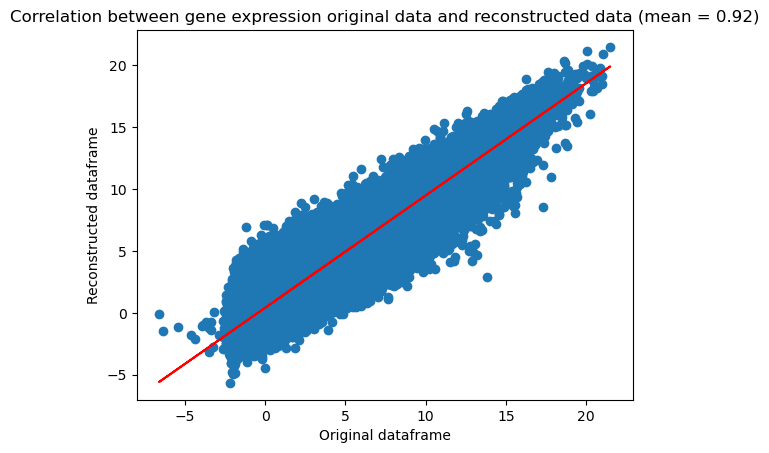

In [37]:
fit = np.polyfit(gene_1d, rec_1d, 1)
fit_fn = np.poly1d(fit)

# Calculate correlation mean
test = gene
test.columns = range(len(gene.columns))
test.index = range(len(test))
correlation = (reconstructed_data).corrwith((test), method='pearson')
corr_mean = correlation.mean()

# Plot the scatter plot and the best-fit line
plt.scatter(gene_1d, rec_1d)
plt.plot(gene_1d, fit_fn(gene_1d), color='red')
plt.xlabel('Original dataframe')
plt.ylabel('Reconstructed dataframe')
plt.title(f'Correlation between gene expression original data and reconstructed data (mean = {corr_mean:.2f})')
plt.show()


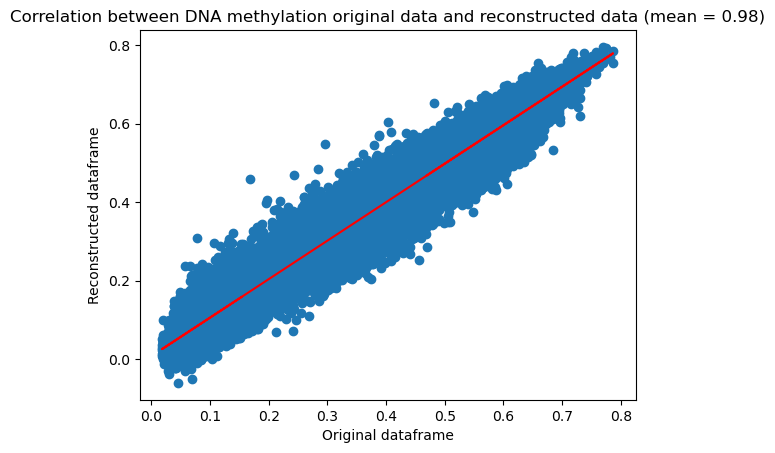

In [44]:
fit = np.polyfit(methyl_1d, rec_1d, 1)
fit_fn = np.poly1d(fit)

# Calculate correlation mean
test = methyl
test.columns = range(len(methyl.columns))
test.index = range(len(test))
correlation = (reconstructed_data).corrwith((test), method='pearson')
corr_mean = correlation.mean()

# Plot the scatter plot and the best-fit line
plt.scatter(methyl_1d, rec_1d)
plt.plot(methyl_1d, fit_fn(methyl_1d), color='red')
plt.xlabel('Original dataframe')
plt.ylabel('Reconstructed dataframe')
plt.title(f'Correlation between DNA methylation original data and reconstructed data (mean = {corr_mean:.2f})')
plt.show()

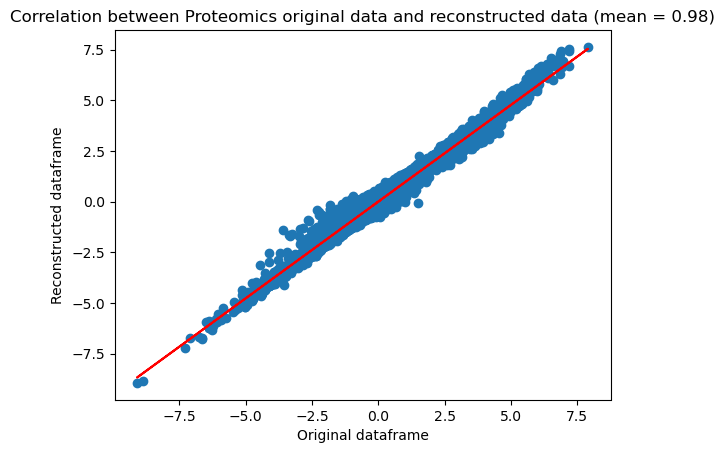

In [53]:
fit = np.polyfit(prot_1d, rec_1d, 1)
fit_fn = np.poly1d(fit)

# Calculate correlation mean
test = prot
test.columns = range(len(prot.columns))
test.index = range(len(test))
correlation = (reconstructed_data).corrwith((test), method='pearson')
corr_mean = correlation.mean()

# Plot the scatter plot and the best-fit line
plt.scatter(prot_1d, rec_1d)
plt.plot(prot_1d, fit_fn(prot_1d), color='red')
plt.xlabel('Original dataframe')
plt.ylabel('Reconstructed dataframe')
plt.title(f'Correlation between Proteomics original data and reconstructed data (mean = {corr_mean:.2f})')
plt.show()

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


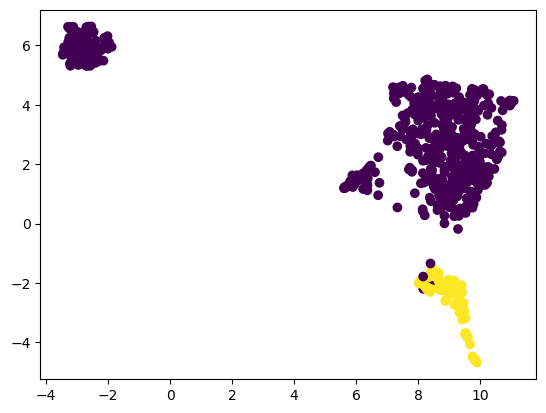

In [27]:
import umap

import matplotlib.pyplot as plt


# Create a UMAP object and fit_transform your data
reducer_conc = umap.UMAP()
embedding_conc = reducer_conc.fit_transform(gene)

# Plot the embedding using matplotlib or any other plotting library
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

scatter = ax.scatter(embedding_conc[:, 0], embedding_conc[:, 1], c=gene_sample)

plt.show()


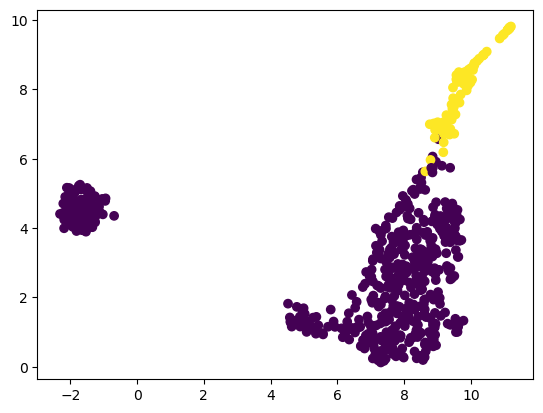

In [28]:
import umap

import matplotlib.pyplot as plt


# Create a UMAP object and fit_transform your data
reducer_conc = umap.UMAP()
embedding_conc = reducer_conc.fit_transform(reconstructed_data)

# Plot the embedding using matplotlib or any other plotting library
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

scatter = ax.scatter(embedding_conc[:, 0], embedding_conc[:, 1], c=gene_sample)

plt.show()


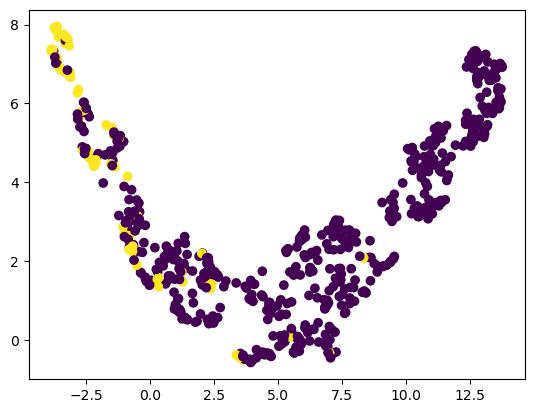

In [38]:
import umap

import matplotlib.pyplot as plt


# Create a UMAP object and fit_transform your data
reducer_conc = umap.UMAP()
embedding_conc = reducer_conc.fit_transform(integrated_space)

# Plot the embedding using matplotlib or any other plotting library
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

scatter = ax.scatter(embedding_conc[:, 0], embedding_conc[:, 1], c=gene_sample)

plt.show()


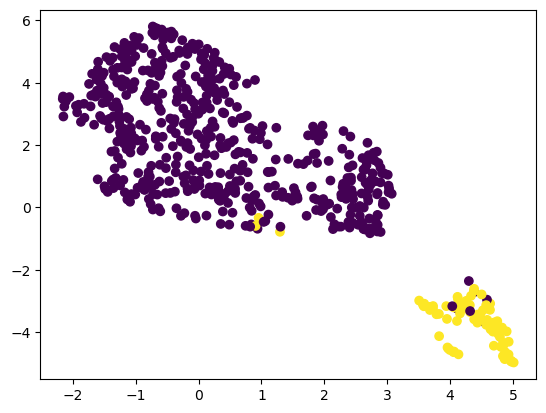

In [45]:
import umap

import matplotlib.pyplot as plt


# Create a UMAP object and fit_transform your data
reducer_conc = umap.UMAP()
embedding_conc = reducer_conc.fit_transform(methyl)

# Plot the embedding using matplotlib or any other plotting library
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

scatter = ax.scatter(embedding_conc[:, 0], embedding_conc[:, 1], c=methyl_sample)

plt.show()


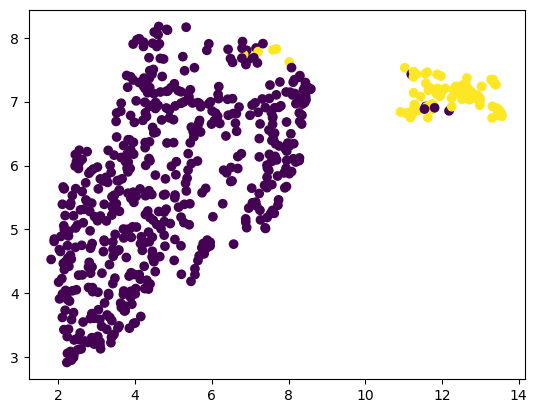

In [46]:
import umap

import matplotlib.pyplot as plt


# Create a UMAP object and fit_transform your data
reducer_conc = umap.UMAP()
embedding_conc = reducer_conc.fit_transform(reconstructed_data)

# Plot the embedding using matplotlib or any other plotting library
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

scatter = ax.scatter(embedding_conc[:, 0], embedding_conc[:, 1], c=methyl_sample)

plt.show()


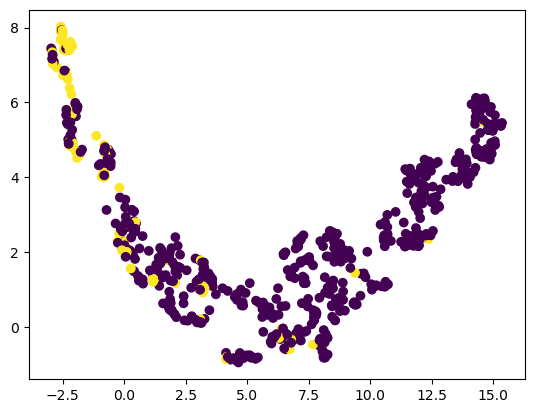

In [47]:
import umap

import matplotlib.pyplot as plt


# Create a UMAP object and fit_transform your data
reducer_conc = umap.UMAP()
embedding_conc = reducer_conc.fit_transform(integrated_space)

# Plot the embedding using matplotlib or any other plotting library
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

scatter = ax.scatter(embedding_conc[:, 0], embedding_conc[:, 1], c=methyl_sample)

plt.show()


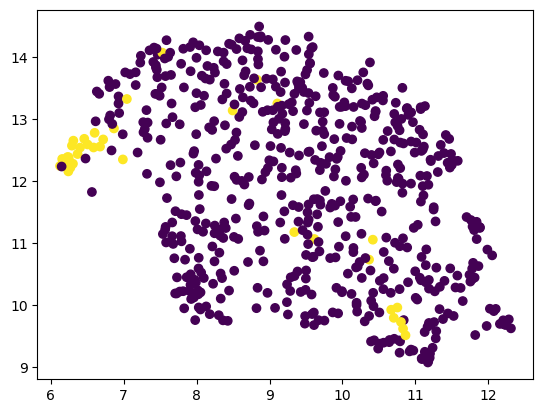

In [54]:
import umap

import matplotlib.pyplot as plt


# Create a UMAP object and fit_transform your data
reducer_conc = umap.UMAP()
embedding_conc = reducer_conc.fit_transform(prot)

# Plot the embedding using matplotlib or any other plotting library
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

scatter = ax.scatter(embedding_conc[:, 0], embedding_conc[:, 1], c=prot_sample)

plt.show()


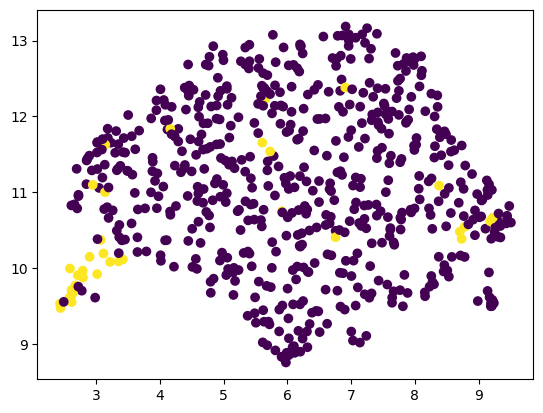

In [55]:
import umap

import matplotlib.pyplot as plt


# Create a UMAP object and fit_transform your data
reducer_conc = umap.UMAP()
embedding_conc = reducer_conc.fit_transform(reconstructed_data)

# Plot the embedding using matplotlib or any other plotting library
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

scatter = ax.scatter(embedding_conc[:, 0], embedding_conc[:, 1], c=prot_sample)

plt.show()


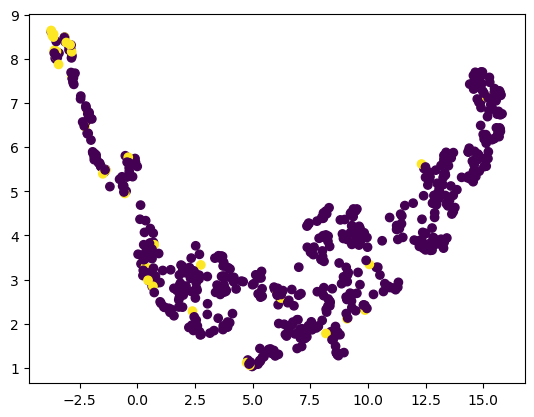

In [56]:
import umap

import matplotlib.pyplot as plt


# Create a UMAP object and fit_transform your data
reducer_conc = umap.UMAP()
embedding_conc = reducer_conc.fit_transform(integrated_space)

# Plot the embedding using matplotlib or any other plotting library
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

scatter = ax.scatter(embedding_conc[:, 0], embedding_conc[:, 1], c=prot_sample)

plt.show()
